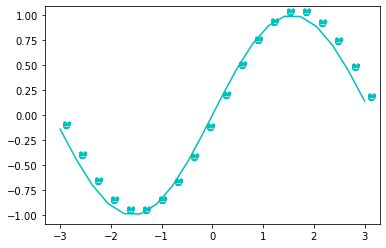

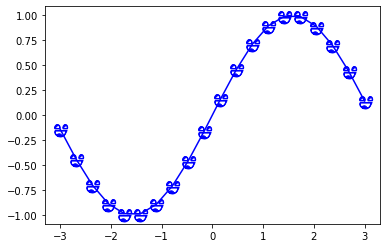

In [1]:
from svgpath2mpl import parse_path
import matplotlib.pyplot as plt
import numpy as np
# Use Inkscape to edit SVG,
# Convert SVG path to matplotlib.path
# Ref: https://github.com/nvictus/svgpath2mpl
smiley = parse_path("""m 739.01202,391.98936 c 13,26 13,57 9,85 -6,27 -18,52 -35,68 -21,20 -50,23 -77,18 -15,-4 -28,-12 -39,-23 -18,-17 -30,-40 -36,-67 -4,-20 -4,-41 0,-60 l 6,-21 z m -302,-1 c 2,3 6,20 7,29 5,28 1,57 -11,83 -15,30 -41,52 -72,60 -29,7 -57,0 -82,-15 -26,-17 -45,-49 -50,-82 -2,-12 -2,-33 0,-45 1,-10 5,-26 8,-30 z M 487.15488,66.132209 c 121,21 194,115.000001 212,233.000001 l 0,8 25,1 1,18 -481,0 c -6,-13 -10,-27 -13,-41 -13,-94 38,-146 114,-193.000001 45,-23 93,-29 142,-26 z m -47,18 c -52,6 -98,28.000001 -138,62.000001 -28,25 -46,56 -51,87 -4,20 -1,57 5,70 l 423,1 c 2,-56 -39,-118 -74,-157 -31,-34 -72,-54.000001 -116,-63.000001 -11,-2 -38,-2 -49,0 z m 138,324.000001 c -5,6 -6,40 -2,58 3,16 4,16 10,10 14,-14 38,-14 52,0 15,18 12,41 -6,55 -3,3 -5,5 -5,6 1,4 22,8 34,7 42,-4 57.6,-40 66.2,-77 3,-17 1,-53 -4,-59 l -145.2,0 z m -331,-1 c -4,5 -5,34 -4,50 2,14 6,24 8,24 1,0 3,-2 6,-5 17,-17 47,-13 58,9 7,16 4,31 -8,43 -4,4 -7,8 -7,9 0,0 4,2 8,3 51,17 105,-20 115,-80 3,-15 0,-43 -3,-53 z m 61,-266 c 0,0 46,-40 105,-53.000001 66,-15 114,7 114,7 0,0 -14,76.000001 -93,95.000001 -76,18 -126,-49 -126,-49 z""")
# smiley matplotlib.path object, refer to Path Tutorial below

# SVG specification: https://www.w3.org/TR/SVG/paths.html
####################
# The path data contains the moveto, lineto, curveto (both cubic and quadratic Béziers), arc and
# closepath instructions.
# (The M indicates a moveto, the L indicate lineto, C indicate curve, and the z indicates a closepath).
x = np.linspace(-3, 3, 20)
plt.plot(x, np.sin(x), marker=smiley, markersize=20, color='c') #, linestyle='None')
plt.show()

smiley.vertices -= smiley.vertices.mean(axis=0) # 0 centered, so it is centered on the line drawn below
plt.plot(x, np.sin(x), marker=smiley, markersize=15, color='b')
plt.show()

In [ ]:
# Path Tutorial
# Ref: https://matplotlib.org/2.0.2/users/path_tutorial.html
############################################################
# The object underlying all of the matplotlib.patch objects is the Path, which supports the
# standard set of moveto, lineto, curveto commands to draw simple and compound outlines
# consisting of line segments and splines. The Path is instantiated with a (N,2) array
# of (x,y) vertices, and a N-length array of path codes. For example to draw the unit
# rectangle from (0,0) to (1,1), we could use this code
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

In [ ]:
# Bézier example
# Some of the path components require multiple vertices to specify them: for example CURVE 3 is a bézier curve with
# one control point and one end point, and CURVE4 has three vertices for the two control points and the end point.
# The example below shows a CURVE4 Bézier spline – the bézier curve will be contained in the convex hull of the start
# point, the two control points, and the end point

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.),  # P0
    (0.2, 1.), # P1
    (1., 0.8), # P2
    (0.8, 0.), # P3
]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
ax.plot(xs, ys, 'x--', lw=2, color='black', ms=10)

ax.text(-0.05, -0.05, 'P0')
ax.text(0.15, 1.05, 'P1')
ax.text(1.05, 0.85, 'P2')
ax.text(0.85, -0.05, 'P3')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()


In [ ]:
import matplotlib.patches as patches

# Compound paths¶
# All of the simple patch primitives in matplotlib, Rectangle, Circle, Polygon, etc, are implemented
# with simple path. Plotting functions like hist() and bar(), which create a number of primitives,
# e.g., a bunch of Rectangles, can usually be implemented more efficiently using a compound path.
# The reason bar creates a list of rectangles and not a compound path is largely historical: the
# Path code is comparatively new and bar predates it. While we could change it now, it would break
# old code, so here we will cover how to create compound paths, replacing the functionality in bar,
# in case you need to do so in your own code for efficiency reasons, e.g., you are creating an
# animated bar plot.

# We will make the histogram chart by creating a series of rectangles for each histogram bar: the
# rectangle width is the bin width and the rectangle height is the number of datapoints in that bin.
# First we’ll create some random normally distributed data and compute the histogram. Because
# numpy returns the bin edges and not centers, the length of bins is 1 greater than the length
# of n in the example below:

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)
# We’ll now extract the corners of the rectangles. Each of the left, bottom, etc, arrays below is
# len(n), where n is the array of counts for each histogram bar:

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
# Now we have to construct our compound path, which will consist of a series of MOVETO, LINETO and
# CLOSEPOLY for each rectangle. For each rectangle, we need 5 vertices: 1 for the MOVETO, 3 for the
# LINETO, and 1 for the CLOSEPOLY. As indicated in the table above, the vertex for the closepoly is
# ignored but we still need it to keep the codes aligned with the vertices:

nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5,0] = left
verts[0::5,1] = bottom
verts[1::5,0] = left
verts[1::5,1] = top
verts[2::5,0] = right
verts[2::5,1] = top
verts[3::5,0] = right
verts[3::5,1] = bottom
# All that remains is to create the path, attach it to a PathPatch, and add it to our axes:

barpath = path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green',
                          edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)
